<a href="https://colab.research.google.com/github/SisekoC/OpenCV/blob/main/Traffic_Forecast_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Information

Investors are considering making an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! While JetRail has mastered the technology and they hold the patent for their product, the investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months.

You need to help Unicorn ventures with the decision. They usually invest in B2C start-ups less than 4 years old looking for pre-series A funding. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months.

## Import modules

In [4]:
!pip install prophet

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from prophet import Prophet

In [ ]:
# !pip install fbprophet
# install visual c++ - visual studio
# if you face errors - use conda install

## Loading the dataset

In [8]:
df = pd.read_csv('Traffic data.csv')
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [9]:
df

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


## Preprocessing the dataset

In [10]:
# check null values
df.isnull().sum()

,0
ID,0
Datetime,0
Count,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [12]:
# convert object to datetime datatype
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        18288 non-null  int64         
 1   Datetime  18288 non-null  datetime64[ns]
 2   Count     18288 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.8 KB


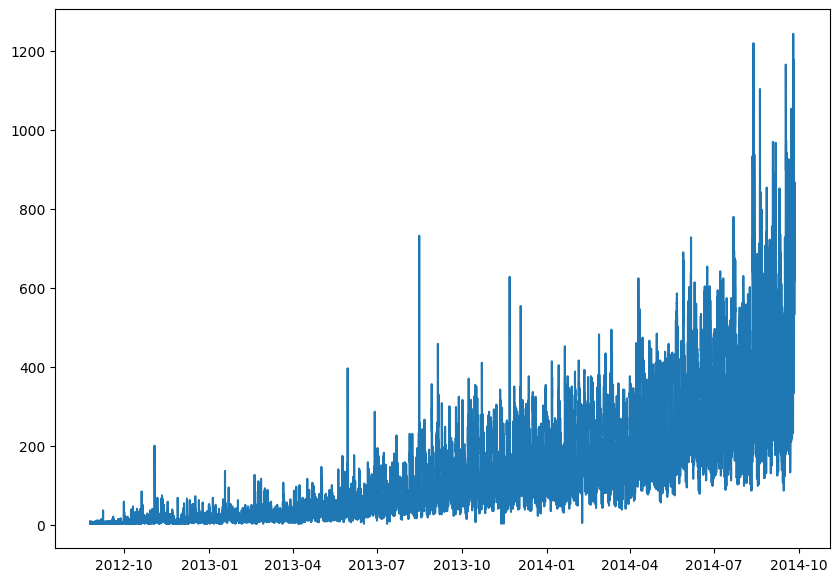

In [13]:
# EDA
plt.figure(figsize=(10,7))
plt.plot(df['Datetime'], df['Count'])
plt.show()

## Format data for the model

In [14]:
df.index = df['Datetime']
df['y'] = df['Count']
df.drop(columns=['ID', 'Datetime', 'Count'], axis=1, inplace=True)
df = df.resample('D').sum()
df.head()

,y
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60


In [15]:
df['ds'] = df.index
df.head()

,y,ds
Datetime,,
2012-08-25,76,2012-08-25
2012-08-26,88,2012-08-26
2012-08-27,62,2012-08-27
2012-08-28,58,2012-08-28
2012-08-29,60,2012-08-29


## Input Split

In [16]:
size = 60
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=size/len(df), shuffle=False)

In [17]:
train.tail()

,y,ds
Datetime,,
2014-07-23,10130,2014-07-23
2014-07-24,8156,2014-07-24
2014-07-25,7192,2014-07-25
2014-07-26,6562,2014-07-26
2014-07-27,6094,2014-07-27


In [18]:
test.head()

,y,ds
Datetime,,
2014-07-28,8546,2014-07-28
2014-07-29,8218,2014-07-29
2014-07-30,8498,2014-07-30
2014-07-31,8740,2014-07-31
2014-08-01,9186,2014-08-01


In [19]:
test.tail()

,y,ds
Datetime,,
2014-09-21,9102,2014-09-21
2014-09-22,14116,2014-09-22
2014-09-23,13304,2014-09-23
2014-09-24,16856,2014-09-24
2014-09-25,14152,2014-09-25


## Model Training

In [23]:
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpggixcp60/tmm_hy93.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpggixcp60/mdoa7or1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3419', 'data', 'file=/tmp/tmpggixcp60/tmm_hy93.json', 'init=/tmp/tmpggixcp60/mdoa7or1.json', 'output', 'file=/tmp/tmpggixcp60/prophet_modely4uv__e6/prophet_model-20240903231434.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:14:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:14:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
future = model.make_future_dataframe(periods=60)
future

,ds
0,2012-08-25
1,2012-08-26
2,2012-08-27
3,2012-08-28
4,2012-08-29
...,...
757,2014-09-21
758,2014-09-22
759,2014-09-23
760,2014-09-24


In [25]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-480.549353,-1800.388666,211.225548,-480.549353,-480.549353,-339.799474,-339.799474,-339.799474,-846.222509,-846.222509,-846.222509,506.423035,506.423035,506.423035,0.0,0.0,0.0,-820.348827
1,2012-08-26,-473.533148,-1838.169022,28.379456,-473.533148,-473.533148,-455.655503,-455.655503,-455.655503,-967.194811,-967.194811,-967.194811,511.539308,511.539308,511.539308,0.0,0.0,0.0,-929.188651
2,2012-08-27,-466.516944,-506.393924,1417.338095,-466.516944,-466.516944,946.386736,946.386736,946.386736,431.219381,431.219381,431.219381,515.167355,515.167355,515.167355,0.0,0.0,0.0,479.869792
3,2012-08-28,-459.500739,-425.459814,1446.996509,-459.500739,-459.500739,957.005846,957.005846,957.005846,439.583977,439.583977,439.583977,517.421870,517.421870,517.421870,0.0,0.0,0.0,497.505107
4,2012-08-29,-452.484535,-565.147090,1400.519111,-452.484535,-452.484535,918.200812,918.200812,918.200812,399.776600,399.776600,399.776600,518.424212,518.424212,518.424212,0.0,0.0,0.0,465.716277


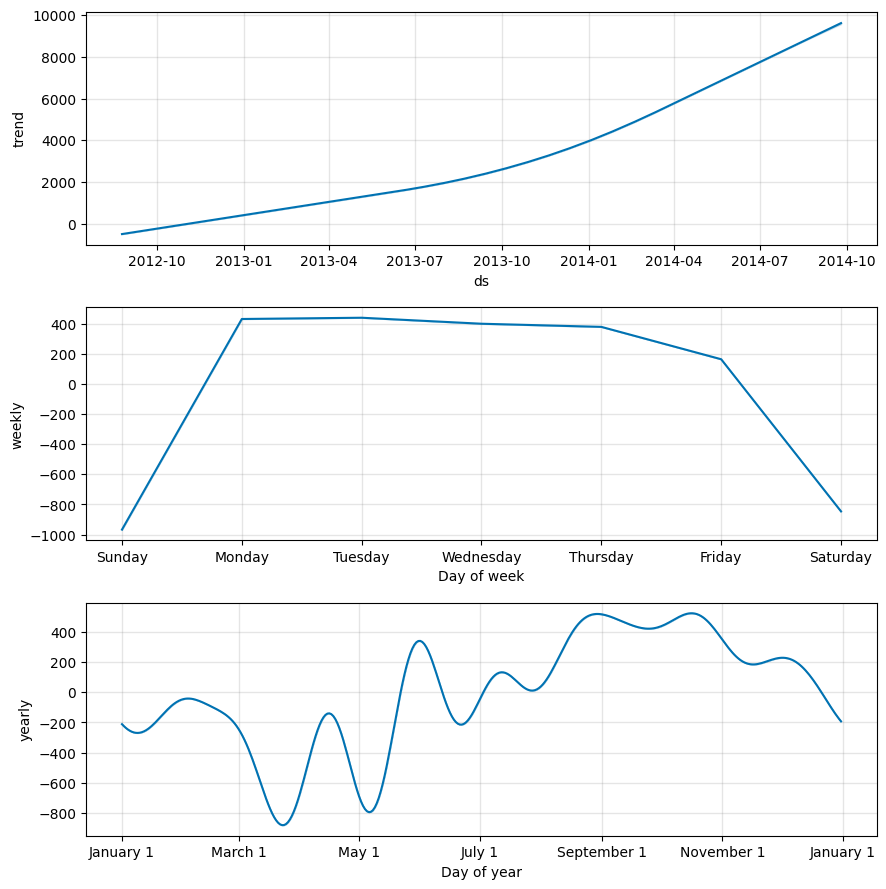

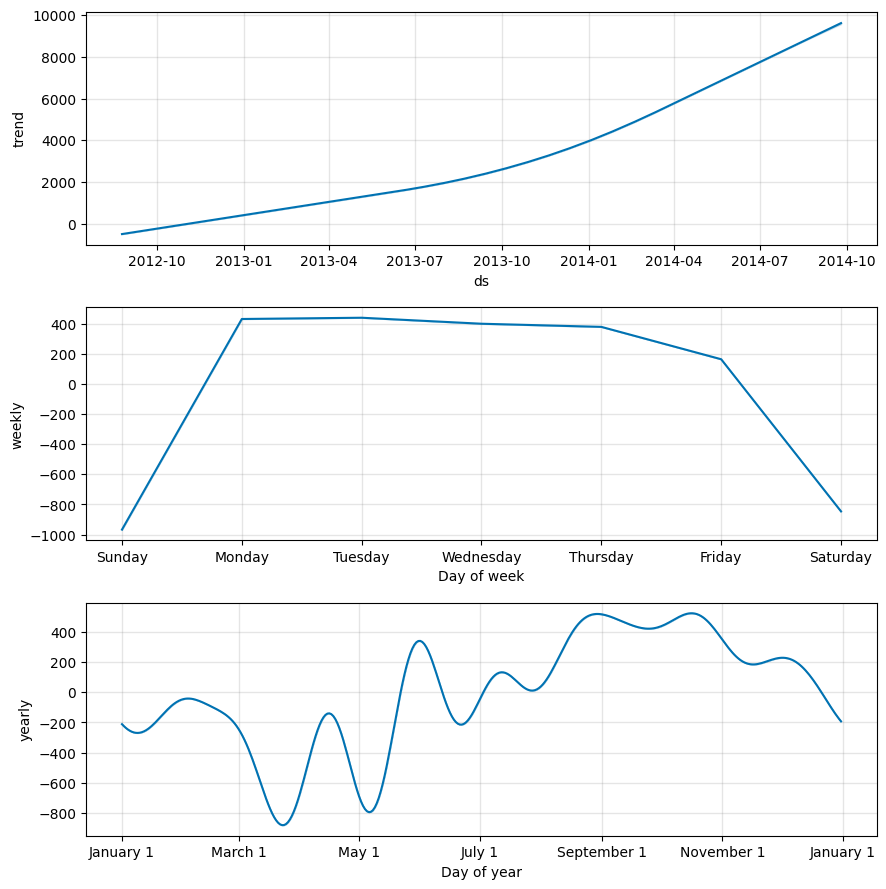

In [26]:
model.plot_components(forecast)

In [27]:
pred = forecast.iloc[-60:, :]
len(pred)

60

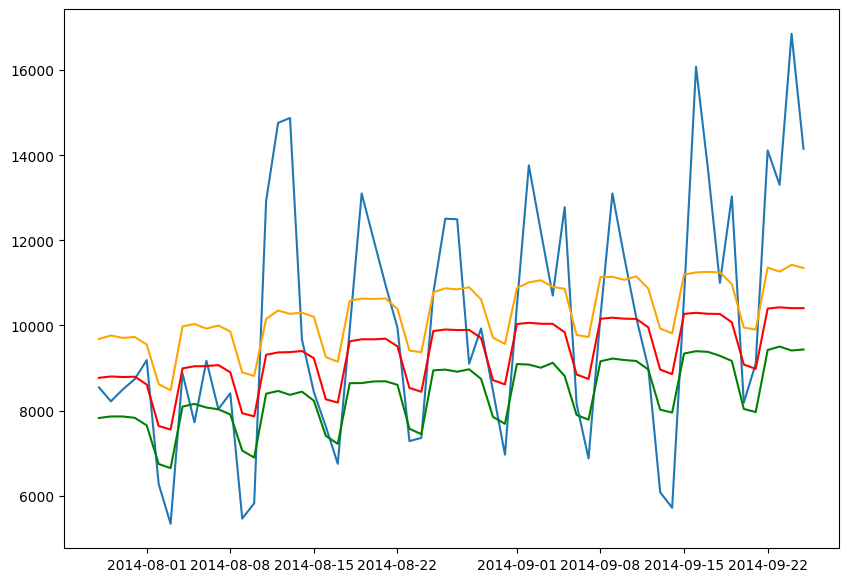

In [28]:
# test results
plt.figure(figsize=(10,7))
plt.plot(test['ds'], test['y'])
plt.plot(pred['ds'], pred['yhat'], color='red')
plt.plot(pred['ds'], pred['yhat_lower'], color='green')
plt.plot(pred['ds'], pred['yhat_upper'], color='orange')
plt.show()

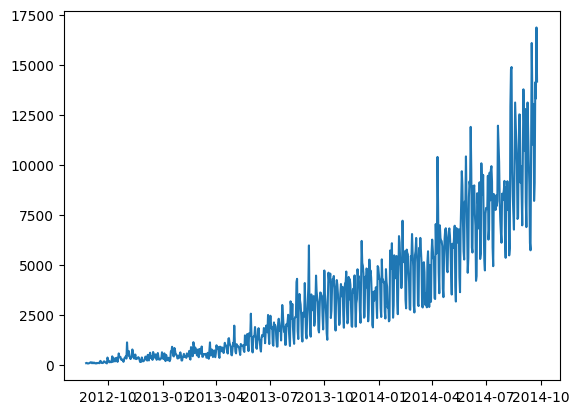

In [29]:
# input data
plt.plot(df['ds'], df['y'])
plt.show()

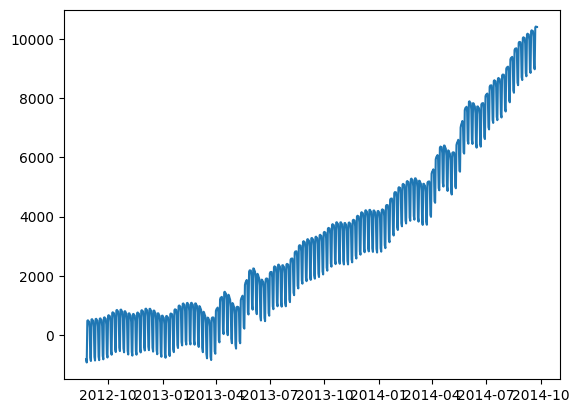

In [30]:
# forecast data
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()

In [31]:
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(df)
future = model.make_future_dataframe(periods=200)
forecast = model.predict(future)
forecast.head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpggixcp60/v2ss8gq_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpggixcp60/jdedy0ez.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10930', 'data', 'file=/tmp/tmpggixcp60/v2ss8gq_.json', 'init=/tmp/tmpggixcp60/jdedy0ez.json', 'output', 'file=/tmp/tmpggixcp60/prophet_model168ol2vk/prophet_model-20240903231905.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:19:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:19:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-676.301489,-2285.071571,87.334526,-676.301489,-676.301489,-422.335565,-422.335565,-422.335565,-995.253546,-995.253546,-995.253546,572.917981,572.917981,572.917981,0.0,0.0,0.0,-1098.637054
1,2012-08-26,-668.253402,-2342.090598,-121.587926,-668.253402,-668.253402,-580.698066,-580.698066,-580.698066,-1144.312380,-1144.312380,-1144.312380,563.614315,563.614315,563.614315,0.0,0.0,0.0,-1248.951468
2,2012-08-27,-660.205316,-911.195263,1493.687821,-660.205316,-660.205316,1009.048146,1009.048146,1009.048146,457.597071,457.597071,457.597071,551.451075,551.451075,551.451075,0.0,0.0,0.0,348.842830
3,2012-08-28,-652.157229,-637.761953,1714.289184,-652.157229,-652.157229,1145.642242,1145.642242,1145.642242,608.400404,608.400404,608.400404,537.241838,537.241838,537.241838,0.0,0.0,0.0,493.485013
4,2012-08-29,-644.109142,-796.790770,1618.500864,-644.109142,-644.109142,1078.767522,1078.767522,1078.767522,556.948562,556.948562,556.948562,521.818959,521.818959,521.818959,0.0,0.0,0.0,434.658379


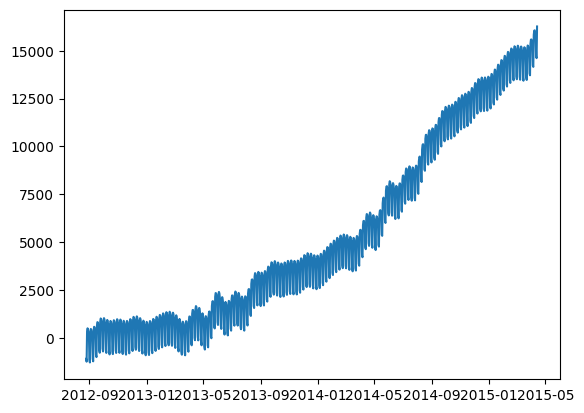

In [32]:
# forecast data
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()